In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt 

C:\Users\natas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
path = 'Data/raw_data'

In [13]:
customer_df = pd.read_csv(path+'Customer.csv')
new_transactions_df = pd.read_csv(path+'Transaction.csv')
product_df = pd.read_csv(path+'Product.csv')

In [6]:
# Prepare merged dataset with age and age groups
eda_df = new_transactions_df.merge(customer_df, on="Customer ID")
eda_df["Age Group"] = pd.cut(
    eda_df["Age"],
    bins=[10, 20, 30, 45, 60, 100],
    labels=["15-20", "21-30", "31-45", "46-60", "60+"],
    right=False
)

# Convert date
eda_df["Purchase Date"] = pd.to_datetime(eda_df["Purchase Date"])

### Customer Behavior 

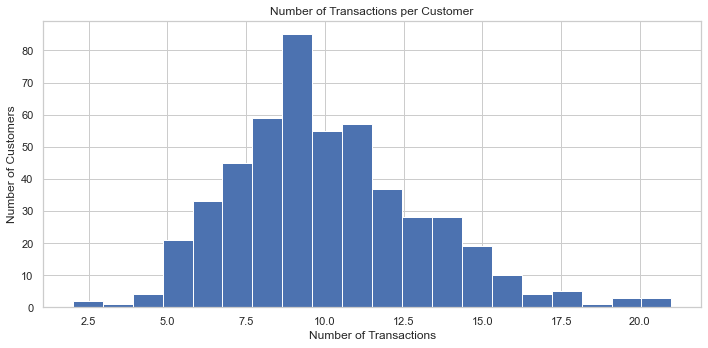

In [7]:
# 1. Transactions per customer
## Shows how many purchases each customer made.
transactions_per_customer = eda_df.groupby("Customer ID")["Transaction ID"].nunique()

plt.figure(figsize=(10, 5))
transactions_per_customer.hist(bins=20)
plt.title("Number of Transactions per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

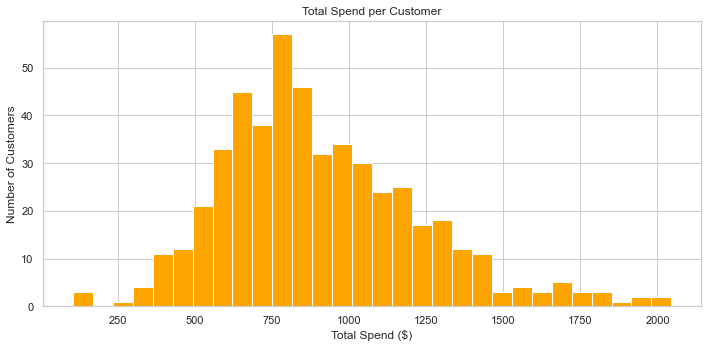

In [8]:
# 2. Average spend per customer
## Reveals customer value distribution.
avg_spend = eda_df.groupby("Customer ID")["Purchase Amount"].sum()

plt.figure(figsize=(10, 5))
avg_spend.hist(bins=30, color='orange')
plt.title("Total Spend per Customer")
plt.xlabel("Total Spend ($)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


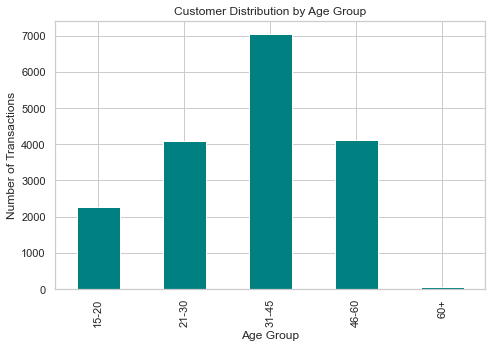

In [18]:
# 3. Age group distribution
## Insights into which age groups are most active.
plt.figure(figsize=(7, 5))
eda_df["Age Group"].value_counts().sort_index().plot(kind="bar", color="teal")
plt.title("Customer Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

### Sales Trend

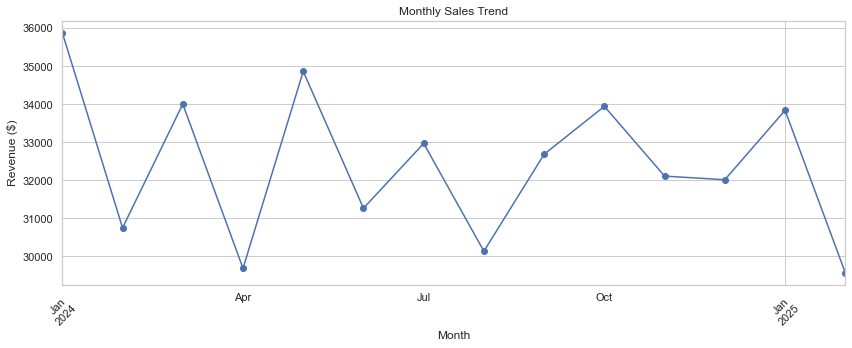

In [10]:
# 4. Monthly Sales Trends
## Visualizes revenue over time.
monthly_sales = eda_df.groupby(eda_df["Purchase Date"].dt.to_period("M"))["Purchase Amount"].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

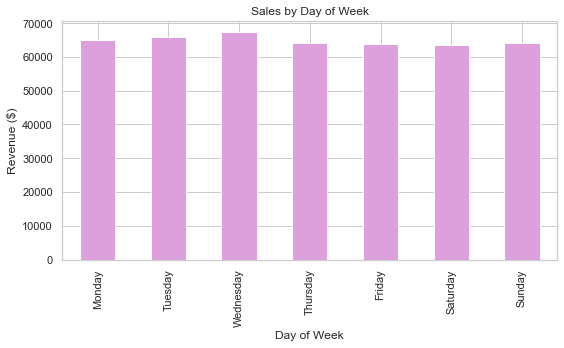

In [19]:
# 5. Day of Week Effect
## Highlights popular shopping days.
eda_df["Day of Week"] = eda_df["Purchase Date"].dt.day_name()
dow_sales = eda_df.groupby("Day of Week")["Purchase Amount"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

plt.figure(figsize=(8, 5))
dow_sales.plot(kind="bar", color="plum")
plt.title("Sales by Day of Week")
plt.ylabel("Revenue ($)")
plt.xlabel("Day of Week")
plt.tight_layout()
plt.show()

### Product and Price Analysis

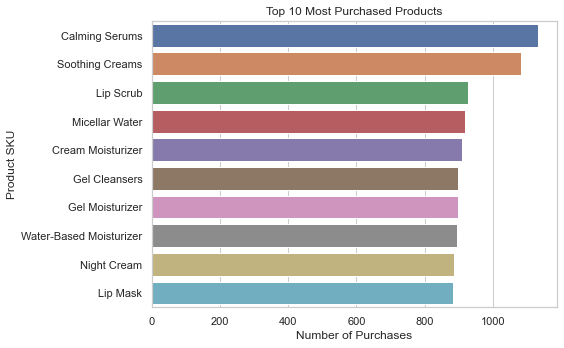

In [14]:
# 6. Top Products
## Your 10 bestsellers.
top_products = eda_df["Product ID"].value_counts().head(10)
top_product_names = product_df.set_index("Product ID").loc[top_products.index]["SKU"]

plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_product_names.values)
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product SKU")
plt.tight_layout()
plt.show()

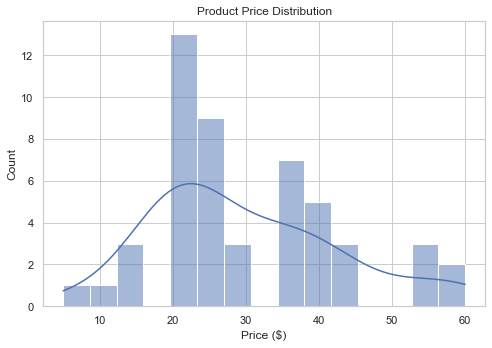

In [15]:
# 7. Price Distribution
## Overview of pricing strategy and spread.
plt.figure(figsize=(7, 5))
sns.histplot(product_df["Product Price ($)"], bins=15, kde=True)
plt.title("Product Price Distribution")
plt.xlabel("Price ($)")
plt.tight_layout()
plt.show()

### Basket and Demographics

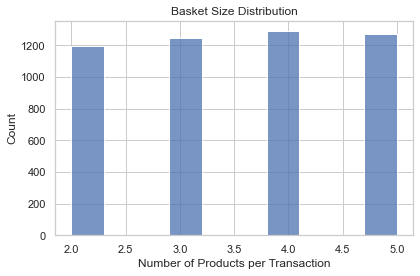

In [16]:
# 8. Average Basket Size
## Average number of products per transaction.
basket_sizes = eda_df.groupby("Transaction ID")["Product ID"].count()

plt.figure(figsize=(6, 4))
sns.histplot(basket_sizes, bins=10, kde=False)
plt.title("Basket Size Distribution")
plt.xlabel("Number of Products per Transaction")
plt.tight_layout()
plt.show()


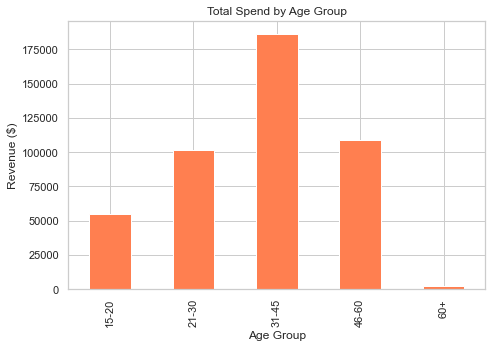

In [17]:
# 9. Spending by Age Group
## Who spends the most.
spend_by_age = eda_df.groupby("Age Group")["Purchase Amount"].sum()

plt.figure(figsize=(7, 5))
spend_by_age.plot(kind="bar", color="coral")
plt.title("Total Spend by Age Group")
plt.ylabel("Revenue ($)")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()


### Correlation heatmap

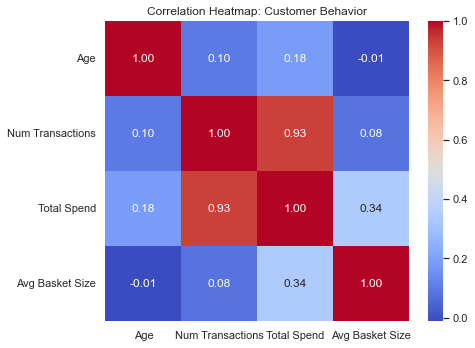

In [20]:
# 10. Age vs. Total Spend, Basket Size, Transactions
customer_summary = eda_df.groupby("Customer ID").agg({
    "Age": "first",
    "Transaction ID": pd.Series.nunique,
    "Purchase Amount": "sum",
    "Product ID": "count"
}).rename(columns={
    "Transaction ID": "Num Transactions",
    "Purchase Amount": "Total Spend",
    "Product ID": "Total Products"
})
customer_summary["Avg Basket Size"] = customer_summary["Total Products"] / customer_summary["Num Transactions"]

# Compute correlation
corr_matrix = customer_summary[["Age", "Num Transactions", "Total Spend", "Avg Basket Size"]].corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Customer Behavior")
plt.tight_layout()
plt.show()
